In [1]:
# Training a binary classifier with the Sarcasm Dataset

import json

# Load JSON file
with open("sarcasm.json",'r') as f:
    d = json.load(f)
    
# Init the lists
sentences = []
labels = []

# Populate data into the lists
for i in d:
    sentences.append(i['headline'])
    labels.append(i['is_sarcastic'])

In [2]:
# Hyperparameters
# Number of training examples
training_size = 20000

# Tokenizer vocabulary size 
vocab_size = 10000

# Padded sequences maximum length
max_length = 32

# Embedding layer output dimensions
embedding_dim = 16

In [3]:
# Split the data

# Split sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [4]:
# Pre-processing the train and test sets

import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters for padding and OOV tokens
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

# Init Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate word index dict
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists to numpy array
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [5]:
# Build and Compile the Model

# How GlobalAveragePooling1d works
# This reduces the dimensionality of the model as compared with Flatten()
# The number of training parameters will also decrease

import tensorflow as tf

# Initialize a GlobalAveragePooling1D (GAP1D) layer
gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

# Define sample array
sample_array = np.array([[[10,2],[1,3],[1,1]]])

# Print shape and contents of sample array
print(f'shape of sample_array = {sample_array.shape}')
print(f'sample array: {sample_array}')

# Pass the sample array to the GAP1D layer
output = gap1d_layer(sample_array)

# Print shape and contents of the GAP1D output array
print(f'output shape of gap1d_layer: {output.shape}')
print(f'output array of gap1d_layer: {output.numpy()}')

shape of sample_array = (1, 3, 2)
sample array: [[[10  2]
  [ 1  3]
  [ 1  1]]]
output shape of gap1d_layer: (1, 2)
output array of gap1d_layer: [[4 2]]


In [6]:
# Flatten model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 16)            160000    
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 24)                12312     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 172,337
Trainable params: 172,337
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Global Average Pooling 1D model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compile the model
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [9]:
# Train the Model
# verbose 2 -> print just the results per epoch
# verbose 1 -> displays a progress bar per epoch
# verbose 0 -> Nothing

num_epochs = 30

history = model.fit(training_padded, training_labels, epochs=num_epochs,
                   validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.5556 - accuracy: 0.7030 - val_loss: 0.3934 - val_accuracy: 0.8289
Epoch 2/30
625/625 - 1s - loss: 0.3063 - accuracy: 0.8760 - val_loss: 0.3461 - val_accuracy: 0.8466
Epoch 3/30
625/625 - 1s - loss: 0.2294 - accuracy: 0.9119 - val_loss: 0.3462 - val_accuracy: 0.8495
Epoch 4/30
625/625 - 1s - loss: 0.1847 - accuracy: 0.9304 - val_loss: 0.3608 - val_accuracy: 0.8535
Epoch 5/30
625/625 - 1s - loss: 0.1536 - accuracy: 0.9428 - val_loss: 0.3956 - val_accuracy: 0.8438
Epoch 6/30
625/625 - 1s - loss: 0.1295 - accuracy: 0.9541 - val_loss: 0.4319 - val_accuracy: 0.8433
Epoch 7/30
625/625 - 1s - loss: 0.1114 - accuracy: 0.9622 - val_loss: 0.4625 - val_accuracy: 0.8416
Epoch 8/30
625/625 - 1s - loss: 0.0957 - accuracy: 0.9675 - val_loss: 0.5127 - val_accuracy: 0.8380
Epoch 9/30
625/625 - 1s - loss: 0.0837 - accuracy: 0.9724 - val_loss: 0.5532 - val_accuracy: 0.8319
Epoch 10/30
625/625 - 1s - loss: 0.0727 - accuracy: 0.9764 - val_loss: 0.6212 - val_accuracy: 0.8292

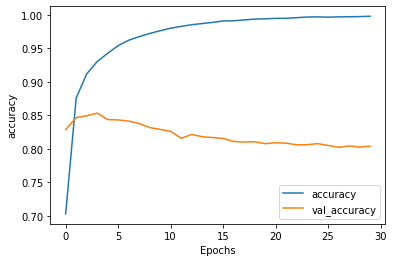

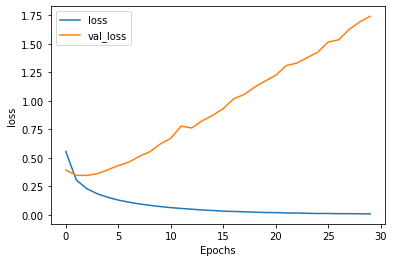

In [10]:
# Visualize the results
# overfit because validation accuracy is slowly dropping while training accuracy is growing
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [11]:
# Visualize Word Embeddings

# Get the index word dictionary
reverse_word_index = tokenizer.index_word

# Get the embedding layer from the model (i.e. first layer)
embedding_layer = model.layers[0]

# Get the weights of the embedding layer
embedding_weights = embedding_layer.get_weights()[0]

print(embedding_weights.shape)

(10000, 16)


In [13]:
# Generate files with a loop
# Loop vocab_size-1, skipping the 0 key because it is just for the padding

import io

# Open writeable files
out_v = io.open('vecs_s.tsv', 'w', encoding='utf-8')
out_m = io.open('meta_s.tsv', 'w', encoding='utf-8')

# Init loop
for word_num in range(1, vocab_size):
    # Get the word associated at the current index
    word_name = reverse_word_index[word_num]
    
    # Get the embedding weights associated with the current index
    word_embedding = embedding_weights[word_num]
    
    # Write the word name
    out_m.write(word_name + "\n")
    
    # Write the word embedding
    out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")
    
# Close the files
out_v.close()
out_m.close()